# Flight Delay Analysis Project
#### Analyze flight data to determine the impact of a delayed arriving flight and if there is a correlated departure delay for the same aircraft. 
Research Question: : Is there a correlation between the size of an airport, International versus Regional, and the likelihood that a departing flight would be delayed due to a delayed inbound aircraft? <br>
### Hypothesis:
There is a positive correlation between the size of an airport (International vs. Regional) and the likelihood that a departing flight would be delayed due to a delayed inbound aircraft. Specifically, it is hypothesized that International airports with higher volumes of air traffic will exhibit a higher probability of delayed departures due to late aircraft compared to smaller, Regional airports.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import scipy as sc
import time_functions as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Set Pandas display options
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Import Data
| File                      | Description |
| ------------------------- | ----------- |
| airlines.csv              | Data contains airline name information |
| airports.csv              | Data contains airport information |
| flights.csv               | Data contains all flight data for 2015 |
| international_airports.csv | Data identifies U.S. International Airports |
| bts_codes.csv | Cross-reference data to get IATA Code from Airport ID |

In [2]:
# Load csv files into Pandas DataFrames
df_airlines = pd.read_csv("data/airlines.csv", index_col=False)
df_airports = pd.read_csv("data/airports.csv", index_col=False)
df_flights = pd.read_csv("data/flights.csv", index_col=False, low_memory=False)
df_intl = pd.read_csv("data/international_airports.csv", index_col=False)
df_bts = pd.read_csv("data/bts_codes.csv", index_col=False)

## Assessing Data
Visualize sample data from each of the imported datasets to determine which values will be of interest for the analysis.

In [3]:
# View the first 5 rows of the Airlines dataset
df_airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [4]:
# View the first 5 rows of the Airport dataset
df_airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [5]:
# View the first 5 rows of the Flights dataset
df_flights.head()


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Find total rows and columns in flights data
df_flights.shape

(5819079, 31)

In [7]:
# View the first 5 rows of the International dataset
df_intl.head()

,CITY,AIRPORT_NAME,STATE,IATA-Code,Status
0,Atlanta,Hartsfield-Jackson Atlanta International,Georgia,ATL,INTL
1,Anchorage,Ted Stevens Anchorage International Airport,Alaska,ANC,INTL
2,Austin,Austin-Bergstrom International,Texas,AUS,INTL
3,Baltimore,Baltimore/Washington International - BWI Airport,Maryland,BWI,INTL
4,Boston,Logan International Airport,Massachusetts,BOS,INTL


In [8]:
# View the first 5 rows of the BTS dataset
df_bts.head()

,AIRPORT_SEQ_ID,AIRPORT_ID,AIRPORT,DISPLAY_AIRPORT_NAME,DISPLAY_AIRPORT_CITY_NAME_FULL
0,1000101,10001,01A,Afognak Lake Airport,"Afognak Lake, AK"
1,1000301,10003,03A,Bear Creek Mining Strip,"Granite Mountain, AK"
2,1000401,10004,04A,Lik Mining Camp,"Lik, AK"
3,1000501,10005,05A,Little Squaw Airport,"Little Squaw, AK"
4,1000601,10006,06A,Kizhuyak Bay,"Kizhuyak, AK"


## Data Cleaning
Review the Flights data and determine which columns and rows can be removed from the dataset.

In [9]:
# Get listing of all columns in the Flight data
df_flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

Drop columns that are not needed in the analysis:
- FLIGHT_NUMBER, DAY_OF_WEEK, AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY, CANCELLATION_REASON, TAXI_OUT,
       WHEELS_OFF, SCHEDULED_TIME, ELAPSED_TIME, AIR_TIME, DISTANCE, WHEELS_ON, TAXI_IN

In [10]:
# Drop columns 
drop = ['FLIGHT_NUMBER', 'DAY_OF_WEEK', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'CANCELLATION_REASON', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN']

df_flights.drop(drop, axis=1, inplace=True)

There are flights that were DIVERTED or CANCELLED. For the purposes of the analysis, those rows will be removed. Drop the columns when finished.

In [11]:
# Drop rows where the flight was CANCELLED OR DIVERTED
df_flights.drop(df_flights.index[df_flights['CANCELLED'] == 1], inplace=True)
df_flights.drop(df_flights.index[df_flights['DIVERTED'] == 1], inplace=True)

# Drop CANCELLED & DIVERTED columns
df_flights.drop('CANCELLED', axis=1, inplace=True)
df_flights.drop('DIVERTED', axis=1, inplace=True)

All NaN values have been removed from the dataset.

In [12]:
# Examine the Flights dataset for NaN (Null) values 
df_flights.isnull().sum(), df_flights.shape

(YEAR                   0
 MONTH                  0
 DAY                    0
 AIRLINE                0
 TAIL_NUMBER            0
 ORIGIN_AIRPORT         0
 DESTINATION_AIRPORT    0
 SCHEDULED_DEPARTURE    0
 DEPARTURE_TIME         0
 DEPARTURE_DELAY        0
 SCHEDULED_ARRIVAL      0
 ARRIVAL_TIME           0
 ARRIVAL_DELAY          0
 dtype: int64,
 (5714008, 13))

The Flights data started with 5819079 rows of data. We now have 5714008 rows remaining.<br>
The total reduction of 1.8% in data rows should not have any material impact on our final results.

Convert DEPARTURE_DELAY and ARRIVAL_DELAY from Float to Integer values.

In [13]:
# Convert column values from Float to Integer
df_flights = df_flights.astype({'DEPARTURE_DELAY':int})
df_flights = df_flights.astype({'ARRIVAL_DELAY':int})

In [14]:
df_flights.head()

,YEAR,MONTH,DAY,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,2015,1,1,AS,N407AS,ANC,SEA,5,2354.0,-11,430,408.0,-22
1,2015,1,1,AA,N3KUAA,LAX,PBI,10,2.0,-8,750,741.0,-9
2,2015,1,1,US,N171US,SFO,CLT,20,18.0,-2,806,811.0,5
3,2015,1,1,AA,N3HYAA,LAX,MIA,20,15.0,-5,805,756.0,-9
4,2015,1,1,AS,N527AS,SEA,ANC,25,24.0,-1,320,259.0,-21


## Join Datasets
- Rename column AIRLINE to AIRLINE_CODE in df_flights
- From df_airports bring in the Airport Name based on the IATA code of the ORIGIN_AIRPORT in df_flights
- From df_airlines bring in the Airline Name based on the IATA code of the AIRLINE_CODE in df_flights
- From df_international_airports bring in the airport Status based on the IATA code of the ORIGIN_AIRPORT in df_flights

In [15]:
# Rename column
df_flights.rename(columns={'AIRLINE': 'AIRLINE_CODE'}, inplace=True)

In df_flights there are standard Airport IATA codes, plus numeric AIRPORT ID codes. Before we match to the values in df_airports to add the airport names, we need to convert the numeric AIRPORT ID codes into IATA Codes. Create temp df's and map values between df_flights and df_bts.

In [16]:
# Filter out ORIGIN_AIRPORT and DESTINATION_AIRPORT with more than 3 characters

# Convert AIRPORT_ID to string type
df_bts['AIRPORT_ID'] = df_bts['AIRPORT_ID'].astype(str)

# Filter out ORIGIN_AIRPORT and DESTINATION_AIRPORT with more than 3 characters
df_org = df_flights['ORIGIN_AIRPORT'].str.len() > 3
df_dest = df_flights['DESTINATION_AIRPORT'].str.len() > 3

# Create a DataFrame with unique mappings
df_org_map = df_bts.groupby('AIRPORT_ID').first()['AIRPORT']
df_dest_map = df_bts.groupby('AIRPORT_ID').first()['AIRPORT']

# Map codes to IATA codes only when there's a match
df_flights.loc[df_org, 'ORIGIN_AIRPORT'] = df_flights.loc[df_org, 'ORIGIN_AIRPORT'].map(df_org_map).fillna(df_flights.loc[df_org, 'ORIGIN_AIRPORT'])
df_flights.loc[df_dest, 'DESTINATION_AIRPORT'] = df_flights.loc[df_dest, 'DESTINATION_AIRPORT'].map(df_dest_map).fillna(df_flights.loc[df_dest, 'DESTINATION_AIRPORT'])

All flights now have valid ORIGIN and DESTINATION IATA codes. Bring in the airport names from df_airports.

In [17]:
# Bring in Airport Name and drop additional columns
df_flights = df_flights.merge(df_airports,left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', 
                              how='left').drop(columns=[
    'IATA_CODE', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE', 'LONGITUDE'])

# Sanity Check
df_flights.isnull().sum(), df_flights.shape

(YEAR                       0
 MONTH                      0
 DAY                        0
 AIRLINE_CODE               0
 TAIL_NUMBER                0
 ORIGIN_AIRPORT             0
 DESTINATION_AIRPORT        0
 SCHEDULED_DEPARTURE        0
 DEPARTURE_TIME             0
 DEPARTURE_DELAY            0
 SCHEDULED_ARRIVAL          0
 ARRIVAL_TIME               0
 ARRIVAL_DELAY              0
 AIRPORT                11919
 dtype: int64,
 (5714008, 14))

There are still rows of data without an Airport name. After researching, these airport names are in the df_bts data.

In [18]:
# Reset the index of df_bts to ensure it's unique
df_bts_unique_index = df_bts.drop_duplicates('AIRPORT').set_index('AIRPORT')

# Filter rows where ORIGIN_AIRPORT is not null and AIRPORT is null
missing_airports_mask = (df_flights['ORIGIN_AIRPORT'].notnull()) & (df_flights['AIRPORT'].isnull())

# Map missing airports to DISPLAY_AIRPORT_NAME from df_bts
missing_airports_mapping = df_bts_unique_index['DISPLAY_AIRPORT_NAME']
df_flights.loc[missing_airports_mask, 'AIRPORT'] = df_flights.loc[missing_airports_mask, 'ORIGIN_AIRPORT'].map(missing_airports_mapping)

# Another Sanity Check
df_flights.isnull().sum(), df_flights.shape

(YEAR                   0
 MONTH                  0
 DAY                    0
 AIRLINE_CODE           0
 TAIL_NUMBER            0
 ORIGIN_AIRPORT         0
 DESTINATION_AIRPORT    0
 SCHEDULED_DEPARTURE    0
 DEPARTURE_TIME         0
 DEPARTURE_DELAY        0
 SCHEDULED_ARRIVAL      0
 ARRIVAL_TIME           0
 ARRIVAL_DELAY          0
 AIRPORT                0
 dtype: int64,
 (5714008, 14))

All Airport name values are now accounted for. Add in Airline Name data from df_airlines.

In [19]:
# Bring in Airline Name and drop additonal columns
df_flights = df_flights.merge(df_airlines, left_on='AIRLINE_CODE', right_on='IATA_CODE', 
                              how='left').drop(columns=['IATA_CODE'])

The next step is to create a Status column that will identify if an Airport is International or Regional. Using the df_intl data, match up the INTL Airports. The rows that are not matched are assumed to be Regional so they are marked as REG.

In [20]:
# Bring in airport Status and drop additional columns
df_flights = df_flights.merge(df_intl, left_on='ORIGIN_AIRPORT', right_on='IATA-Code', 
                              how='left').drop(columns=['CITY','AIRPORT_NAME', 'STATE', 'IATA-Code'])

# Set Status to REG for all flights that are not already identified as INTL
df_flights['Status'] = df_flights['Status'].fillna("REG")

Convert the Year, Month, and Day columns into a Date column. Drop the Year, Month, and Day columns when finished.

In [21]:
# Create DATE column
df_flights['DATE'] = pd.to_datetime(df_flights[['YEAR', 'MONTH', 'DAY']])

# Drop columns
drop = ['YEAR', 'MONTH', 'DAY']
df_flights.drop(drop, axis=1, inplace=True)

Convert SCHEDULED_DEPARTURE, DEPARTURE_TIME, SCHEDULED_ARRIVAL, ARRIVAL_TIME columns to proper time values HH:MM.<br>
Add the DATE infront of the time for SCHEDULED_DEPARTURE.

In [22]:
# Time functions reused under Apache 2.0 License
# https://www.kaggle.com/code/fabiendaniel/predicting-flight-delays-tutorial
# Original author: FABIENDANIEL 

df_flights['SCHEDULED_DEPARTURE'] = tf.flight_time(df_flights, 'SCHEDULED_DEPARTURE')
df_flights['DEPARTURE_TIME'] = df_flights['DEPARTURE_TIME'].apply(tf.format_hour)
df_flights['SCHEDULED_ARRIVAL'] = df_flights['SCHEDULED_ARRIVAL'].apply(tf.format_hour)
df_flights['ARRIVAL_TIME'] = df_flights['ARRIVAL_TIME'].apply(tf.format_hour)

In [23]:
# Check to see if any data went missing after time functions
df_flights.isnull().sum(), df_flights.shape

(AIRLINE_CODE           0
 TAIL_NUMBER            0
 ORIGIN_AIRPORT         0
 DESTINATION_AIRPORT    0
 SCHEDULED_DEPARTURE    0
 DEPARTURE_TIME         0
 DEPARTURE_DELAY        0
 SCHEDULED_ARRIVAL      0
 ARRIVAL_TIME           0
 ARRIVAL_DELAY          0
 AIRPORT                0
 AIRLINE                0
 Status                 0
 DATE                   0
 dtype: int64,
 (5714008, 14))

Validate that the time fields now contain desired formatting.

In [24]:
# View the first 5 rows of the data
df_flights.head()

,AIRLINE_CODE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,AIRPORT,AIRLINE,Status,DATE
0,AS,N407AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11,04:30:00,04:08:00,-22,Ted Stevens Anchorage International Airport,Alaska Airlines Inc.,INTL,2015-01-01
1,AA,N3KUAA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8,07:50:00,07:41:00,-9,Los Angeles International Airport,American Airlines Inc.,INTL,2015-01-01
2,US,N171US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2,08:06:00,08:11:00,5,San Francisco International Airport,US Airways Inc.,INTL,2015-01-01
3,AA,N3HYAA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5,08:05:00,07:56:00,-9,Los Angeles International Airport,American Airlines Inc.,INTL,2015-01-01
4,AS,N527AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1,03:20:00,02:59:00,-21,Seattle-Tacoma International Airport,Alaska Airlines Inc.,INTL,2015-01-01


Export combined flight data to all_flights.csv to examine in Tableau to ensure all the data is appropriate and valid for analysis.

In [25]:
# Export all flight data to .csv for visualization in Tableau
df_flights.to_csv('data/all_flights.txt', encoding='utf-8', index=False)

Sample data in Tableau to get a visual representation of the data, and to gather insights on how to perform the row-by-row itteration to mark flights as DELAYED or NOT DELAYED.<br><br>
![Tableau Screenshot](https://github.com/GaryLBentley/FlightDelays/blob/main/images/tableau.jpg?raw=true)

Based on analysis in Tableau, the desired column order and sorting was determined.

In [26]:
# Change the order of the columns
df_flights = df_flights[['DATE', 'TAIL_NUMBER', 'SCHEDULED_DEPARTURE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DEPARTURE_TIME', 
                         'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'Status', 'AIRLINE_CODE', 
                         'AIRLINE', 'AIRPORT']]

# Sort the dataframe
df_flights.sort_values(by=['DATE', 'TAIL_NUMBER', 'SCHEDULED_DEPARTURE'], axis=0, ascending=[True, True, True], inplace=True,
                       kind='quicksort', ignore_index=True, key=None)

## Identify Delayed Flights
Parse the Flights data and identify all departing flihts that have been delayed due to an inbound aircraft delay.<br>
Add a new DELAYED column to the Flights data to hold that status.


In [27]:
# Add a new DELAYED column with blank values
df_flights['DELAYED'] = 0

Iterate through the entire df_flights dataset row by row. Based on the DATE, TAIL_NUMBER, capture the ARRIVAL_DELAY of the first row and then move to the next row. If the DATE and TAIL_NUMBER still match, capture the DEPARTURE_DELAY value. If both the ARRIVAL_DELAY from the previous row and the DEPARTURE_DELAY from the current row are > 0, then mark Status DELAYED (1). If not, mark Status as NOT DELAYED (0). Each time the DATE or TAIL_NUMBER changes, the current row will be marked as NOT DELAYED (0). This is the first flight of the day and cannot be delayed due to a late inbound flight the night before. Itterate through the data until all rows have a Status.

In [28]:
start_date = ""
curr_date = "" 
start_tail = ""
curr_tail = ""

for index, row in df_flights.iterrows():
    curr_date = row["DATE"]
    curr_tail = row["TAIL_NUMBER"]

    # Start of flight data for new date
    if start_date != curr_date:     
        
        # Starting new date and aircraft
        start_date = curr_date      
        start_tail = curr_tail

        # Capture the arrival delay
        arrival_delay = row["ARRIVAL_DELAY"]  

        # Mark row as NOT DELAYED
        df_flights.at[index, 'DELAYED'] = 0

    else:   # Dates match so still processing that days' flights
       
        # Check to see if still processing same aircraft
        if start_tail == curr_tail:
            
            # Capture the departure delay 
            departure_delay = row["DEPARTURE_DELAY"]

            # Get the arrival delay of the flight we just added for next iteration
            arrival_delay = row["ARRIVAL_DELAY"]

            # If previous flight row has ARRIVAL_DELAY > 0 and this row has DEPARTURE_DELAY > 0
            if (arrival_delay > 0 and departure_delay > 0):

                # Mark row as DELAYED
                df_flights.at[index, 'DELAYED'] = 1

            else:   # No delay match

                # Get the new arrival delay
                arrival_delay = row["ARRIVAL_DELAY"]

                # Mark row as NOT DELAYED
                df_flights.at[index, 'DELAYED'] = 0

        else:   # Date matches but new aircraft

            # Capture the arrival delay and set the start_tail
            arrival_delay = row["ARRIVAL_DELAY"]
            start_tail = curr_tail

            # Mark row as NOT DELAYED
            df_flights.at[index, 'DELAYED'] = 0


All flights have been tagged as either DELAYED or NOT DELAYED.

In [29]:
# Get the count of DELAYED flights
df_flights['DELAYED'].value_counts()

DELAYED
0    4429752
1    1284256
Name: count, dtype: int64

## Data Analysis
- Get count of INTL and REG flights
- Split data into INTL and REG dataset


Determine the number of International and Regional flights in our data.

In [30]:
# Count of INTL and REG flights
df_flights['Status'].value_counts()

Status
INTL    4596217
REG     1117791
Name: count, dtype: int64

Split into INTL and REG data frames for analysis.

In [31]:
# Create INTL and REG datasets
df_intl = df_flights[df_flights['Status'] == 'INTL']
df_reg = df_flights[df_flights['Status'] == 'REG']

#df_intl_delay = df_intl[df_intl['DELAYED'] == 1]
#df_reg_delay = df_reg[df_reg['DELAYED'] == 1]

df_all_delay = df_flights[df_flights['DELAYED'] ==1]

Based on casual observation of the raw data, there appeared to be a lot of outliers around DEPARTURE_DELAY. We will use box plots to visualize these outliers.

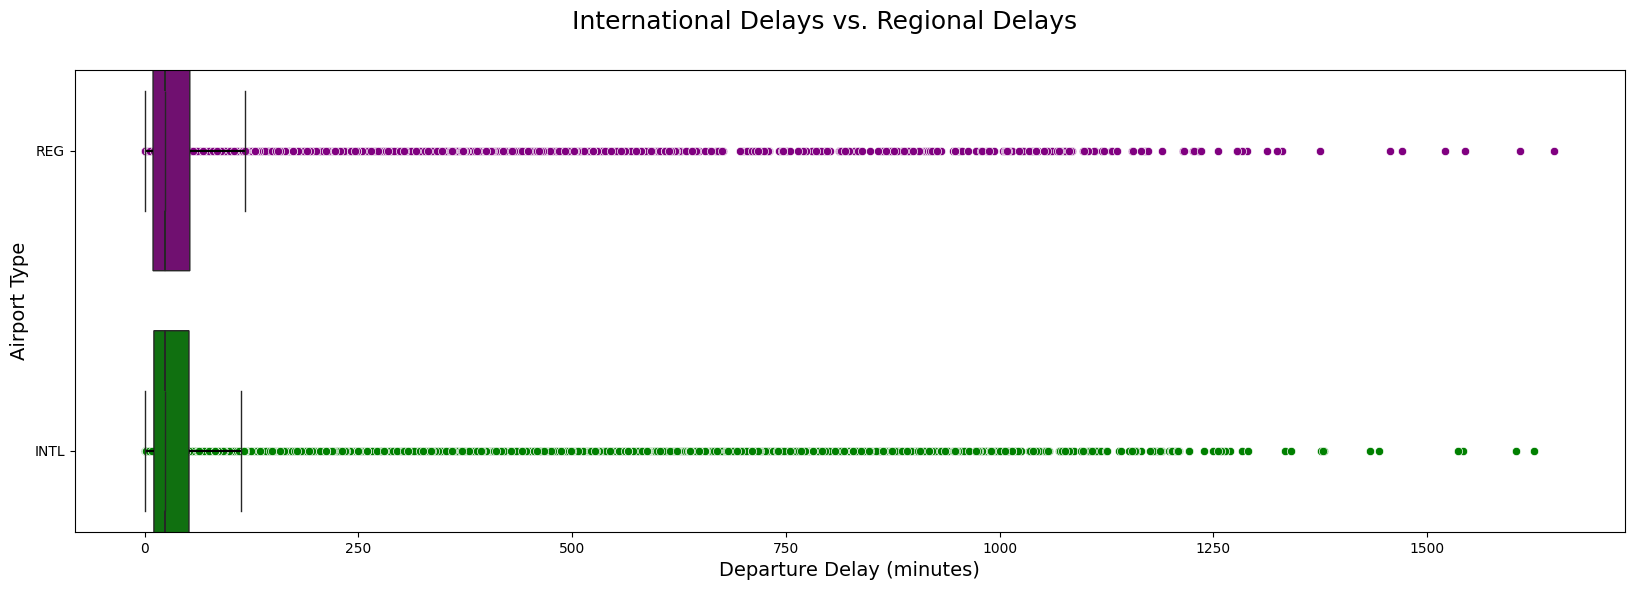

In [32]:
# Define custom colors for the boxplots
custom_palette = {'INTL': 'green', 'REG': 'purple'}

# Create the boxplot
plt.subplots(nrows=1, ncols=1, figsize=(20,6))
plt.suptitle('International Delays vs. Regional Delays', size=18)
sns.boxplot(x='DEPARTURE_DELAY', y='Status', hue='Status', data=df_all_delay, palette=custom_palette, 
            flierprops=dict(markerfacecolor='none', markeredgecolor='none', alpha=0.0),
            whiskerprops=dict(color='black', linewidth=1.5), notch=True)

# Add scatterplot with same hue colors for outlier circles
for i, status in enumerate(df_all_delay['Status'].unique()):
    sns.scatterplot(data=df_all_delay[df_all_delay['Status'] == status], x='DEPARTURE_DELAY', y='Status', color=custom_palette[status])

# Set x-label and y-label
plt.xlabel('Departure Delay (minutes)', fontsize=14)
plt.ylabel('Airport Type', fontsize=14)


# Display the boxplot
plt.show()

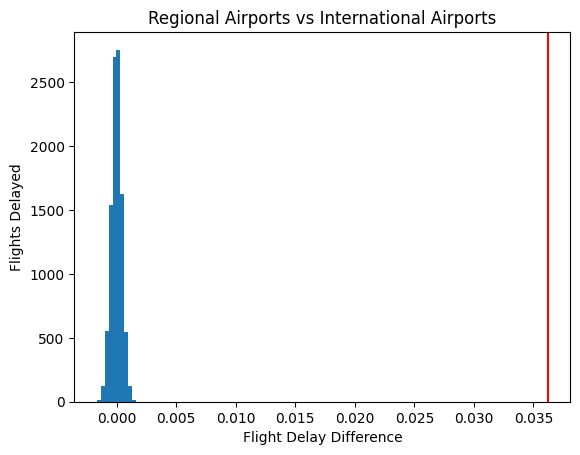

In [37]:
# Null hypotheis testing New = Old = Population
# No difference in the probability of a flight being delayed between
# Intl and Reg airports

# Get the probablility a flight being delayed for the enitre population
p_population = df_flights['DELAYED'].sum() / df_flights.shape[0]

# Probability of an INTL airport flight being delayed
p_intl = df_intl['DELAYED'].mean()  # Control

# Probability of a REG airport flight being delayed
p_reg = df_reg['DELAYED'].mean()    # Treatment

# Observed difference
obs_diff = (p_intl - p_reg)

# Set both p_new and p_old to the population probability of being delayed
p_new = pd.to_numeric(p_population)
p_old = pd.to_numeric(p_population)

# Number of flights for each airport type
n_new = df_reg['SCHEDULED_DEPARTURE'].value_counts().sum()
n_old = df_intl['SCHEDULED_DEPARTURE'].value_counts().sum()

# Simulate a sample for the REG airports - Treatment
p_val_new =[p_new, 1 - p_new]
reg_delayed = np.random.choice(2, size=n_new, p=p_val_new)

# Simulate a sample for the INTL airports - Control
p_val_old =[p_old, 1 - p_old]
intl_delayed = np.random.choice(2, size=n_old, p=p_val_old)

# Sampling distribution 
p_diffs = []

# Bootstrap samples for both new and old pages
for _ in range(10000):
    reg_delayed = np.random.choice(2, size=n_new, replace=True, p=p_val_new)
    intl_delayed = np.random.choice(2, size=n_old, replace=True, p=p_val_old)

    p_diffs.append(reg_delayed.mean() - intl_delayed.mean())

# Convert p_diffs to a numpy array so it can be ploted in a histogram
p_diffs = np.array(p_diffs)

# Create the histogram
plt.hist(p_diffs);
plt.xlabel('Flight Delay Difference')
plt.ylabel('Flights Delayed')
plt.title('Regional Airports vs International Airports')
plt.axvline(x=obs_diff, color="r")
plt.show()


In [33]:
from scipy.stats import ttest_ind

# Perform independent samples t-test for delayed flights
t_statistic, p_value = ttest_ind(
    df_intl[df_intl['DELAYED'] == 1]['DEPARTURE_DELAY'],
    df_reg[df_reg['DELAYED'] == 1]['DEPARTURE_DELAY'],
    equal_var=False  # Set equal_var=False if variances are assumed to be unequal
)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: -13.328097501068177
P-value: 1.6333969993523695e-40


In [34]:
from scipy.stats import f_oneway

# Perform one-way ANOVA for delayed flights
f_statistic, p_value = f_oneway(
    df_intl[df_intl['DELAYED'] == 1]['DEPARTURE_DELAY'],
    df_reg[df_reg['DELAYED'] == 1]['DEPARTURE_DELAY']
)

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)


F-statistic: 215.54011158917334
P-value: 8.574463287431542e-49


In [41]:
p_val_final = (p_diffs < obs_diff).mean()
p_val_final

1.0

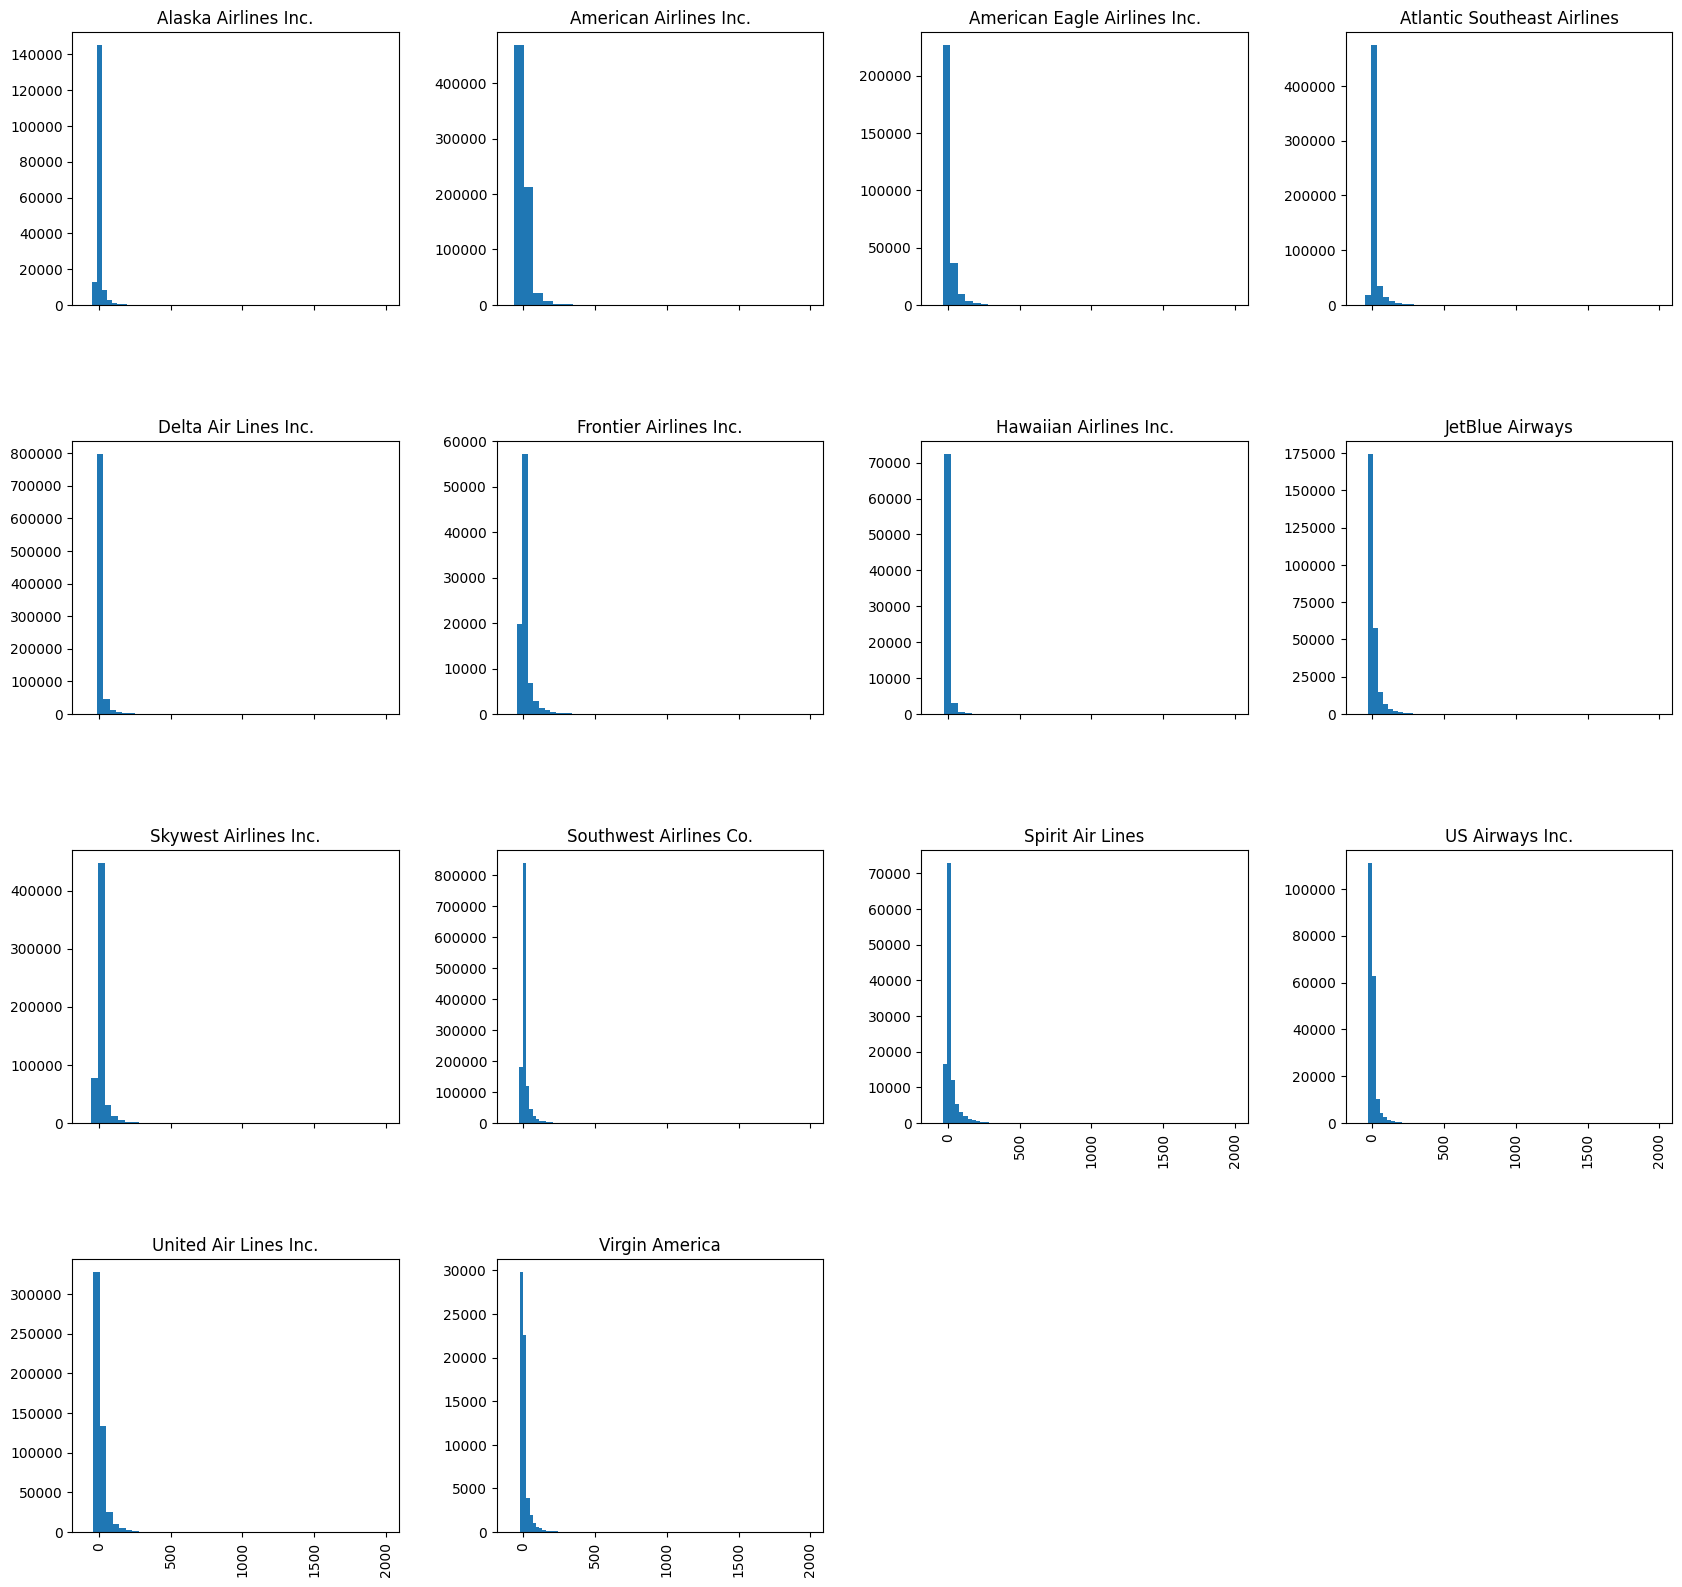

In [43]:
df_flights.hist(column='DEPARTURE_DELAY', by='AIRLINE', bins=30, figsize=(20, 20), sharex=True);